# Visualización de precios de electricidad y consumo horario

El precio de la electricidad está de actualidad debido a una reciente escalada de precios. En este notebook realizamos diversas visualizaciones útiles.  

## Datos de precios

Comenzamos cargando un fichero con la evolución del precio del kWh durante el mes de junio. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"
prices = pd.read_csv('PrecioEnergiaJunio2021.csv',
                     parse_dates=['datetime'],sep=',')
prices.head()

,datetime,value
0,2021-06-01 00:00:00+02:00,116.33
1,2021-06-01 01:00:00+02:00,115.95
2,2021-06-01 02:00:00+02:00,114.89
3,2021-06-01 03:00:00+02:00,114.96
4,2021-06-01 04:00:00+02:00,114.84


Representamos la serie de precios

<AxesSubplot:xlabel='datetime'>

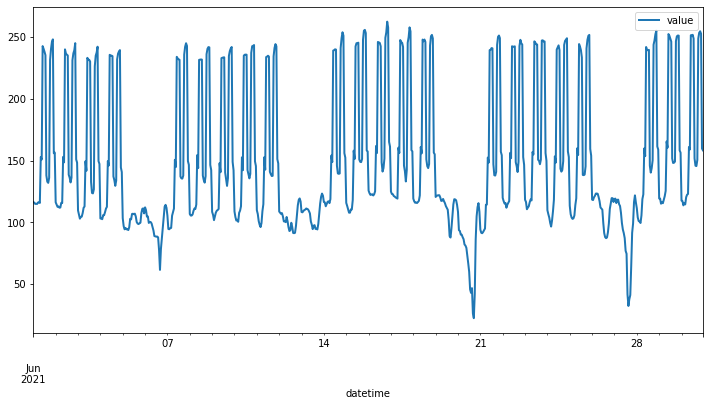

In [2]:
prices.set_index('datetime').plot(figsize=(12,6),linewidth=2)

## *Heat Maps*: representación de información que depende de dos dimensiones. 

La representación anterior sugiere periodicidad pero no la plasma en detalle. Buscamos una representación mejor. 

Para ello, generamos dos nuevas columnas, una con la fecha y otra con la hora del día.

In [3]:
prices['date'] = prices['datetime'].apply(lambda x: x.date())
prices['hour'] = prices['datetime'].apply(lambda x: x.hour)
prices.head()

,datetime,value,date,hour
0,2021-06-01 00:00:00+02:00,116.33,2021-06-01,0
1,2021-06-01 01:00:00+02:00,115.95,2021-06-01,1
2,2021-06-01 02:00:00+02:00,114.89,2021-06-01,2
3,2021-06-01 03:00:00+02:00,114.96,2021-06-01,3
4,2021-06-01 04:00:00+02:00,114.84,2021-06-01,4


A continuación pivotamos los datos

In [4]:
prices2D = prices.pivot(index='date',values='value',columns='hour')
prices2D.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2021-06-01,116.33,115.95,114.89,114.96,114.84,116.03,116.29,115.70,152.89,150.83,...,137.96,132.88,131.93,135.99,231.44,240.40,246.20,248.08,155.91,156.50
2021-06-02,116.20,114.37,112.53,112.87,111.85,111.97,115.76,115.64,152.96,148.53,...,138.51,136.15,132.27,136.19,231.20,236.77,239.27,245.00,150.92,148.31
2021-06-03,109.58,106.08,102.96,104.45,104.62,107.53,111.76,112.82,149.44,141.77,...,132.65,123.78,123.41,126.76,226.34,234.88,237.45,242.13,149.56,147.21
2021-06-04,103.12,102.95,102.52,105.81,105.77,108.25,111.09,112.52,149.52,145.98,...,137.15,134.09,129.52,133.79,231.88,236.58,238.32,239.39,144.42,140.65
2021-06-05,103.40,96.97,94.35,95.48,94.31,94.51,93.76,96.09,102.83,102.36,...,104.82,100.25,98.99,98.59,99.19,99.66,107.30,110.92,111.30,107.22


Ahora podemos representar los datos con el precio a lo largo de cada día (cada curva, un día).

<AxesSubplot:xlabel='hour'>

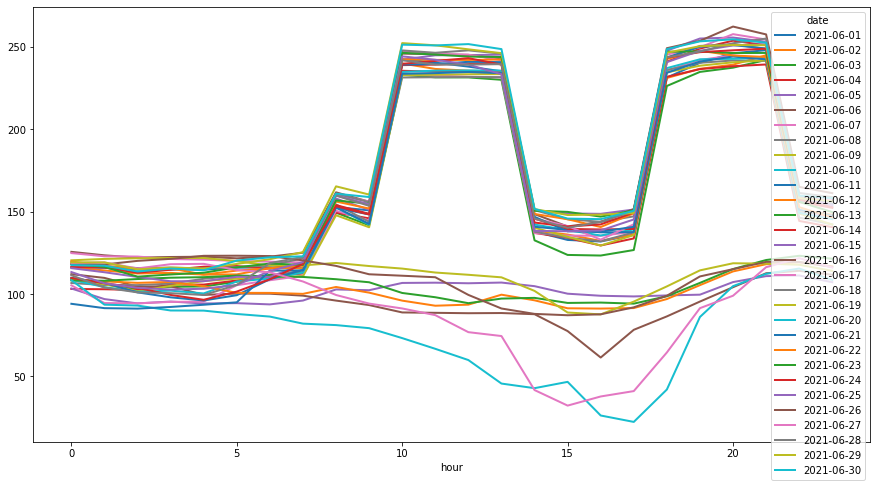

In [5]:
#fig,ax = plt.subplots(1,1,figsize=(12,6))
prices2D.T.plot(figsize=(15,8),linewidth=2)

Esta representación no captura la secuencia de los días. Una buena alternativa es la representación mediante mapa de calor. 

In [6]:
px.imshow(prices2D)

¿Y si quisiéramos una visualización que capture patrones semanales?

Hacemos un pre-procesado similar al anterior. Para reducir la resolución temporal, sumamos todos los precios de cada día.

In [7]:
prices['week'] = prices['datetime'].apply(lambda x: x.isocalendar()[1])
prices['day_of_week'] = prices['datetime'].apply(lambda x: x.isocalendar()[2])
# Promediamos todos los precios de un día para obtener un único precio para ese día
prices_daily = prices.groupby(['week','day_of_week'])['value'].mean().reset_index()

In [8]:
prices_daily.head()

,week,day_of_week,value
0,22,2,166.771250
1,22,3,164.775000
2,22,4,159.230000
3,22,5,160.554583
4,22,6,101.650000


In [9]:
prices.groupby(['week','day_of_week'])['value'].mean()

week  day_of_week
22    2              166.771250
      3              164.775000
      4              159.230000
      5              160.554583
      6              101.650000
      7               96.004583
23    1              160.118750
      2              161.871250
      3              161.172917
      4              162.527500
      5              161.789583
      6              102.726667
      7              106.362917
24    1              169.028333
      2              171.170000
      3              175.740000
      4              173.128333
      5              172.395000
      6              112.953333
      7               76.900000
25    1              163.202500
      2              169.442083
      3              171.074167
      4              166.028750
      5              166.978333
      6              110.196250
      7               92.157500
26    1              168.155417
      2              174.385000
      3              174.500000
Name: value, dtype: fl

In [10]:
prices2D_weekly = prices_daily.pivot(index='week',values='value',columns='day_of_week')
px.imshow(prices2D_weekly)

## Datos de consumo

In [11]:
consumos = pd.read_csv('ConsumoJunio2021.csv',sep=';',decimal=',')
consumos['Fecha'] = pd.to_datetime(consumos['Fecha'], format='%d/%m/%Y')
consumos['Hora'] = consumos['Hora'] - 1
consumos.head()

,Fecha,Hora,Consumo_kWh
0,2021-06-01,0,0.108
1,2021-06-01,1,0.098
2,2021-06-01,2,0.087
3,2021-06-01,3,0.090
4,2021-06-01,4,0.084


Si queremos representar la curva de todo el mes, tenemos que construir una columna *datetime* similar a la del anterior dataframe. 

In [12]:
from datetime import timedelta
consumos['datetime'] = consumos.apply(lambda row: row['Fecha']+timedelta(hours=row['Hora']),axis=1)
consumos.head()

,Fecha,Hora,Consumo_kWh,datetime
0,2021-06-01,0,0.108,2021-06-01 00:00:00
1,2021-06-01,1,0.098,2021-06-01 01:00:00
2,2021-06-01,2,0.087,2021-06-01 02:00:00
3,2021-06-01,3,0.090,2021-06-01 03:00:00
4,2021-06-01,4,0.084,2021-06-01 04:00:00


<AxesSubplot:xlabel='datetime'>

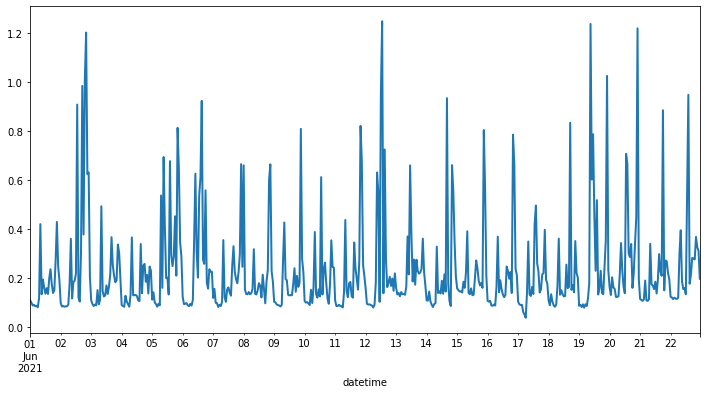

In [13]:
consumos.set_index('datetime')['Consumo_kWh'].plot(figsize=(12,6),linewidth=2)

De nuevo, representamos en 2D para detectar patrones

In [14]:
consumos2D = consumos.pivot(index='Fecha',values='Consumo_kWh',columns='Hora')
consumos2D.head()

Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-06-01,0.108,0.098,0.087,0.090,0.084,0.086,0.080,0.118,0.419,0.133,...,0.134,0.199,0.235,0.173,0.138,0.150,0.270,0.428,0.248,0.189
2021-06-02,0.097,0.083,0.085,0.082,0.084,0.084,0.091,0.174,0.359,0.116,...,0.120,0.103,0.309,0.983,0.377,1.008,1.201,0.623,0.630,0.203
2021-06-03,0.108,0.093,0.085,0.091,0.088,0.150,0.092,0.110,0.492,0.146,...,0.165,0.214,0.366,0.251,0.210,0.182,0.190,0.336,0.302,0.193
2021-06-04,0.089,0.085,0.082,0.127,0.103,0.092,0.082,0.132,0.365,0.129,...,0.105,0.338,0.137,0.250,0.257,0.184,0.212,0.136,0.246,0.229
2021-06-05,0.111,0.141,0.100,0.093,0.082,0.094,0.088,0.536,0.159,0.693,...,0.676,0.294,0.248,0.286,0.451,0.209,0.812,0.645,0.344,0.287


In [15]:
px.imshow(consumos2D)

## Unimos datos y precios

Para poder unir los dos dataframes deben coincidir en la fecha y en la hora

In [16]:
# Hacemos que el tiempo sea el índice en los dos dataframes
prices.set_index('datetime',inplace=True)
prices.index = prices.index.tz_convert(None) # Esto se hace para... es una larga historia
consumos.set_index('datetime',inplace=True)

In [17]:
# Los unimos
precios_consumos = prices.merge(consumos,left_index=True,right_index=True)
precios_consumos.head()

,value,date,hour,week,day_of_week,Fecha,Hora,Consumo_kWh
datetime,,,,,,,,
2021-06-01 00:00:00,114.89,2021-06-01,2,22,2,2021-06-01,0,0.108
2021-06-01 01:00:00,114.96,2021-06-01,3,22,2,2021-06-01,1,0.098
2021-06-01 02:00:00,114.84,2021-06-01,4,22,2,2021-06-01,2,0.087
2021-06-01 03:00:00,116.03,2021-06-01,5,22,2,2021-06-01,3,0.090
2021-06-01 04:00:00,116.29,2021-06-01,6,22,2,2021-06-01,4,0.084


Ahora podemos hacer un *scatter-plot* de precios frente a consumo, que nos permitirá saber si estamos haciendo un consumo eficiente

<AxesSubplot:xlabel='value', ylabel='Consumo_kWh'>

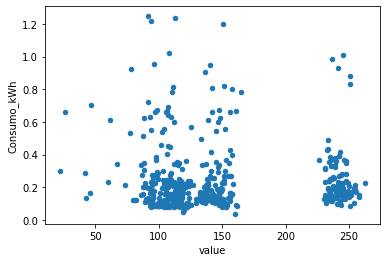

In [18]:
precios_consumos.plot.scatter(x='value',y='Consumo_kWh')

Una forma (burda) de determinar si nuestro consumo ha sido eficiente es mediante un modelo de regresión: si el coeficiente es negativo, significa que estamos consumiendo más en las horas más baratas. Si es positivo, ¡lo estamos haciendo mal!

<AxesSubplot:xlabel='value', ylabel='Consumo_kWh'>

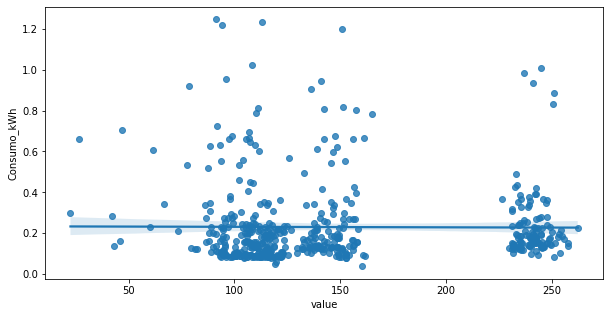

In [19]:
import seaborn as sns
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.regplot(x="value", y="Consumo_kWh", data=precios_consumos,ax=ax)